In [11]:
import numpy as np
import cv2
import math
import pyautogui
import time


# GET Central Pixel of CAM

In [12]:
img = cv2.imread("Sample_1.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_green = np.array([0, 0, 0])
upper_green = np.array([255, 255, 255])



mask = cv2.inRange(hsv, lower_green,upper_green)
contours, hierarchy = cv2.findContours(mask,  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
M = cv2.moments(cnt)
mask = cv2.inRange(hsv, lower_green,upper_green)
contours, hierarchy = cv2.findContours(mask,  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

o_x = int(M['m10']/M['m00'])
o_y = int(M['m01']/M['m00'])
O_=[o_x]+[o_y]
print(O_)

[1403, 639]


# Main implementation

In [13]:
# img = cv2.imread("Sample_1.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_green = np.array([33, 80, 40])
upper_green = np.array([102, 255, 255])

mask = cv2.inRange(hsv, lower_green,upper_green)
contours, hierarchy = cv2.findContours(mask,  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
Dx=[] 
Dy=[]
DO_=[]
SO_=[]
a=math.pi/4
Tan=math.tan(a) 
AS=5
SO=round(AS*Tan)

# O_O=

print(SO)
for i in range(4,0,-1):
    cnt = contours[i]
    M = cv2.moments(cnt)
    dx = int(M['m10']/M['m00'])
    dy = int(M['m01']/M['m00'])
    Dx=Dx+[dx]
    Dy=Dy+[dy]
for i in range(len(Dx)):
    dO_=((Dy[i]-O_[1])**2)**0.5
    DO_=DO_+[dO_]
for i in range(len(DO_)):
    DO_[i]=DO_[i]*0.005   #let scale be 0.005cm/pix
    
for i in range(len(DO_)):
    sO_=(SO*(AS-DO_[i]))/AS
    SO_=SO_+[sO_]
    
    
    
print(Dx)
print(Dy)
print(DO_)
print(SO_)
# cnt = contours[0]
# M = cv2.moments(cnt)
# cx = int(M['m10']/M['m00'])
# cy = int(M['m01']/M['m00'])

# # print(cx,cy)
# mask_final = mask
# contours, hierarchy = cv2.findContours(mask.copy(),  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2.imshow('hsv',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

5
[603, 603, 603, 603]
[26, 165, 223, 282]
[3.065, 2.37, 2.08, 1.7850000000000001]
[1.935, 2.63, 2.92, 3.215]


#pts are according to fig
#d denotes different centroid points of green circle in Fig
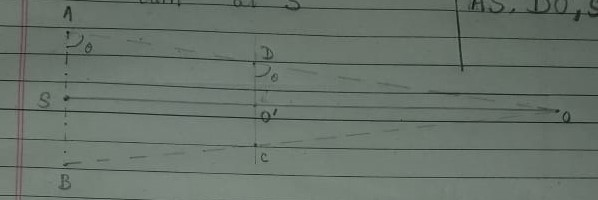 